Code for Taxi problem using TD(0) or Q-learning algorithm

In [4]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
env= gym.make("Taxi-v3")
env.reset()
#env.render()

(206, {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)})

In [14]:
#initialising hyperparameters
episodes =5000
alpha = 0.1
gamma = 0.9             
epsilon =0.1
#initialising array to store total reward for each episode
rewards=np.zeros(episodes)

In [15]:
#initialising q-table
num_rows=env.observation_space.n
num_columns=env.action_space.n
qtable=np.zeros((num_rows,num_columns))

#function to run each episode
def episode():
    total_reward=0

    state=env.reset()[0]
    done = False
    
    while not done:
        #choose action by epsilon-greedy policy
        if np.random.uniform(0,1)<epsilon:
            action = env.action_space.sample()
        elif np.max(qtable[state])>0:
            action = np.argmax(qtable[state])
        else:
            action = env.action_space.sample()
        new_state,reward,terminated,truncated,info = env.step(action)
        done = truncated or terminated                                      #becomes true when episode terminates or gets truncated
        total_reward+=reward
        
        #update qtable
        qtable[state,action]+= alpha*(reward + gamma*np.max(qtable[new_state])-qtable[state,action])

        state=new_state
        
    return total_reward 
    

In [16]:
#run the episodes
for epi in range(episodes):
    rewards[epi]=episode()

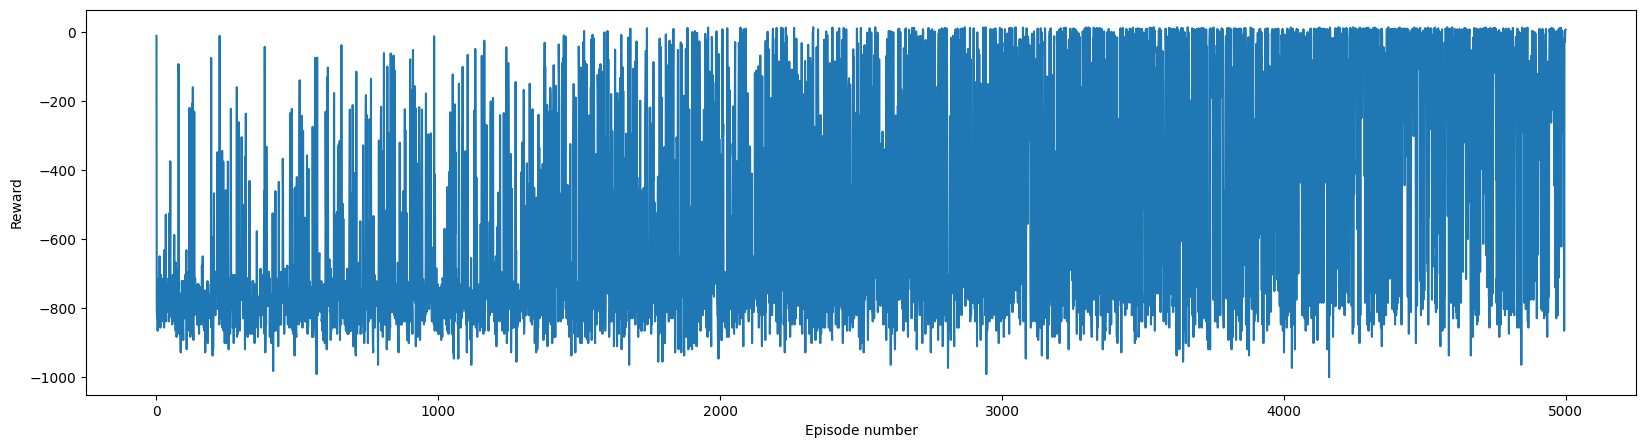

In [17]:
x= [i for i in range(episodes)]
y= rewards
plt.figure(figsize=(20,5))
plt.xlabel("Episode number")
plt.ylabel("Reward")
ax =plt.gca()
#plot the graph for episode no. vs total reward in each episode
plt.plot(x,y)
plt.show()

In [18]:
sum=0
counter_successful=0
counter_unsuccessful=0
for number in range(1000):
    state=env.reset()[0]
    done = False
    total_reward=0
    while not done:
        action = np.argmax(qtable[state])
        new_state,reward,terminated,truncated,info = env.step(action)
        done = terminated or truncated
        total_reward+=reward
        
        state=new_state
    print(total_reward)
    if total_reward!=-200:
        sum=sum+total_reward
        counter_successful+=1
    else:
        counter_unsuccessful+=1
print("Average reward in successful runs:",sum/counter_successful)
print("No.of succesful runs:",counter_successful)
print("No.of unsuccessful runs:",counter_unsuccessful)

6
10
4
9
4
8
13
9
11
12
5
14
7
4
7
9
9
8
6
15
11
7
5
4
8
7
8
15
7
9
3
6
9
11
10
10
5
7
7
6
5
8
7
8
10
7
7
7
6
13
6
7
8
7
7
10
7
7
11
7
9
5
6
14
4
7
4
7
5
7
12
12
8
12
4
6
9
7
9
9
8
11
6
5
8
6
12
6
14
13
9
13
8
10
11
8
9
7
11
5
4
13
12
7
3
9
5
5
8
9
7
13
15
3
10
10
7
12
7
10
11
8
11
7
5
8
3
14
5
7
6
6
11
6
15
9
4
9
11
4
9
6
10
10
9
11
6
6
6
13
3
8
11
15
11
5
15
5
8
8
8
5
9
4
9
8
4
11
8
9
7
8
9
6
9
8
6
12
10
7
5
6
5
8
12
4
8
4
4
15
9
7
9
11
6
8
8
8
9
4
7
5
8
4
8
10
9
5
9
13
15
7
6
7
6
9
10
7
11
5
12
12
14
10
8
5
8
12
8
7
8
9
8
5
7
3
7
7
5
9
9
4
7
11
5
8
11
7
3
9
5
6
9
8
11
10
8
7
11
7
12
11
5
5
7
6
9
13
10
7
10
10
4
7
10
12
7
7
10
6
7
4
4
10
10
3
8
8
8
8
8
5
8
3
11
14
9
6
12
8
8
8
10
8
6
9
7
9
8
11
9
6
6
8
8
10
4
5
5
9
9
12
5
8
10
4
8
6
6
8
10
8
4
5
8
11
5
11
14
11
9
5
9
8
10
5
9
6
11
9
7
3
6
10
5
10
10
11
7
6
13
10
10
10
12
6
12
9
3
7
10
5
10
6
3
5
6
10
4
7
4
5
9
9
4
8
7
7
8
5
7
10
5
4
7
10
7
5
7
14
5
9
12
10
6
6
3
9
8
7
8
8
12
7
8
11
10
9
6
8
8
13
7
10
4
14
8
8
9
8
11
7
8
3
5
6
10
12
1

As we can see here, TD(0) algorithm always results in a successful run for 5000 training episodes with an average reward of about 7.5 to 8.5. The number of successful runs decreases for lower number of training episodes though. It becoms about 35-40% for 1000 training episodes. This is still better than the number for monte carlo algorithm with 5000 training episodes.

The average reward for TD(0) for 5000 training episodes is about 7.5 to 8.0 but the average reward for successful runs for Monte Carlo for 5000 training episodes is about 10.5. One possible reasons for this could be that Monte Carlo algorithm fails when the taxi is pretty far from the destination due to which although the number of successful runs is less, the average reward is higher. This can possibly be explained by the fact that monte carlo relies on actual returns instead of bootstrapping. Due to this the true reward relies on the fact that the taxi actually reaches the destination. When the taxi is far from the destination, the chances of it actually reaching the destination are very low and due to which the value function doesn't actually converge to the actual value. 